<a href="https://colab.research.google.com/github/wereign/aera-vera-keras-nathu-geras/blob/main/Image_AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [ ]:
# total number of pixels = 784
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))


In [ ]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))



In [ ]:
alpha = 1.5
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss='binary_crossentropy',optimizer=SGD(learning_rate=alpha),
                    metrics='accuracy')


In [ ]:
autoencoder.fit(X_train,X_train,epochs=5,validation_data=[X_test,X_test])

Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2537 - accuracy: 0.0866 - val_loss: 0.2101 - val_accuracy: 0.1265
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1833 - accuracy: 0.1604 - val_loss: 0.1635 - val_accuracy: 0.1830
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1589 - accuracy: 0.1954 - val_loss: 0.1556 - val_accuracy: 0.2021
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1492 - accuracy: 0.2116 - val_loss: 0.1434 - val_accuracy: 0.2183
Epoch 5/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1422 - accuracy: 0.2223 - val_loss: 0.1379 - val_accuracy: 0.2229


In [ ]:
passed_images = autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 23ms/step


In [ ]:
print(passed_images.shape)

(10, 28, 28)


Original


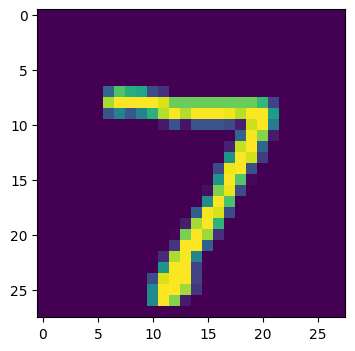

Reconstruction


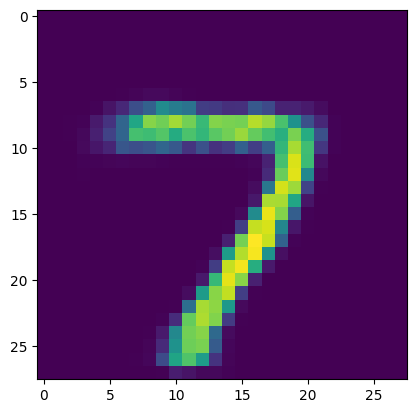

Original


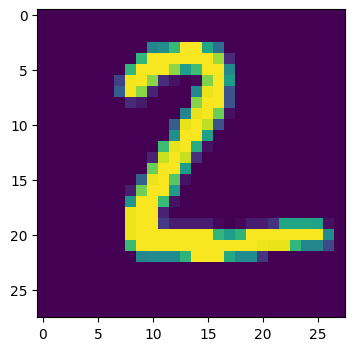

Reconstruction


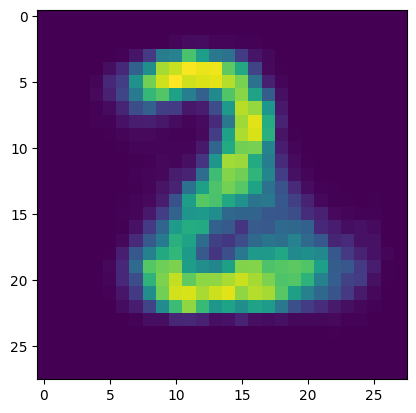

Original


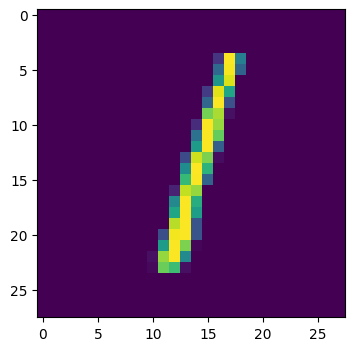

Reconstruction


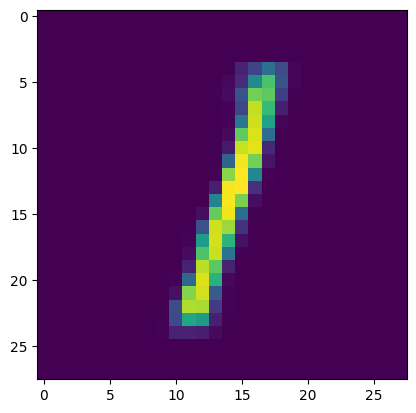

Original


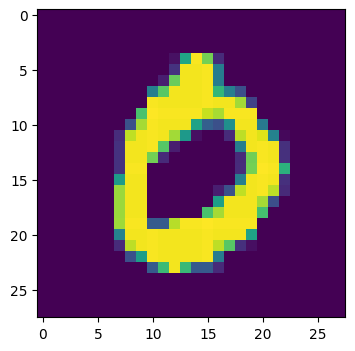

Reconstruction


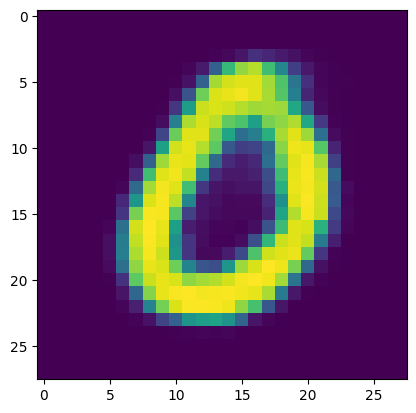

Original


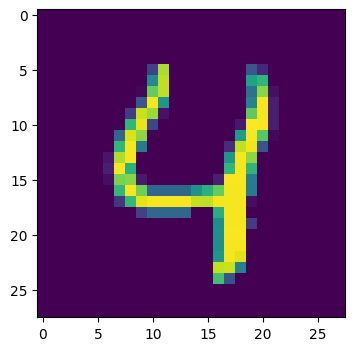

Reconstruction


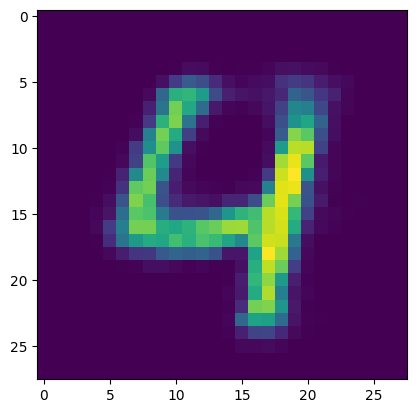

Original


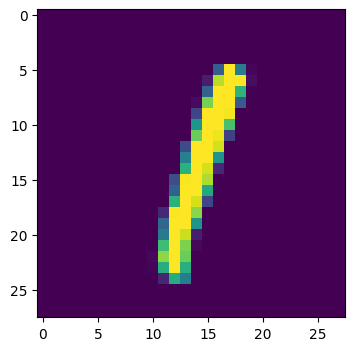

Reconstruction


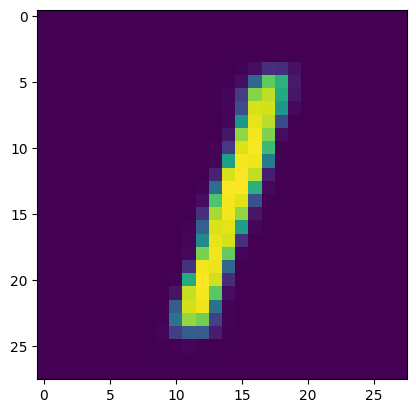

Original


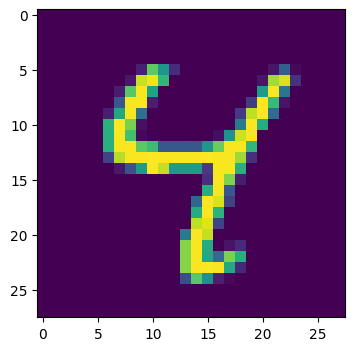

Reconstruction


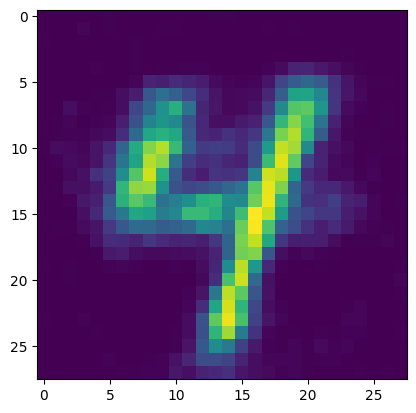

Original


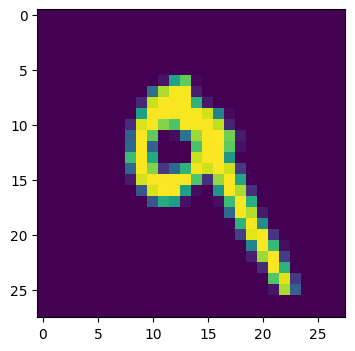

Reconstruction


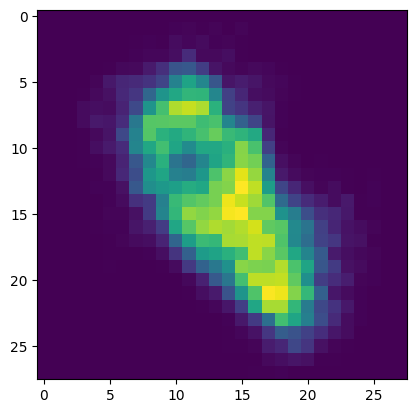

Original


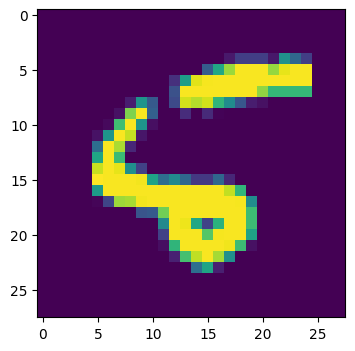

Reconstruction


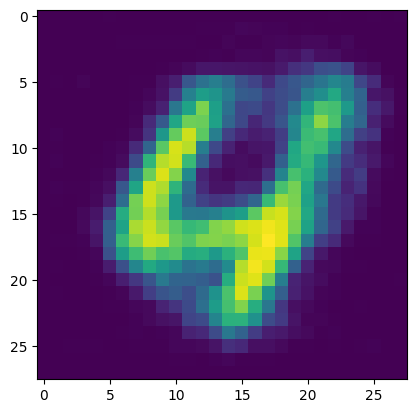

Original


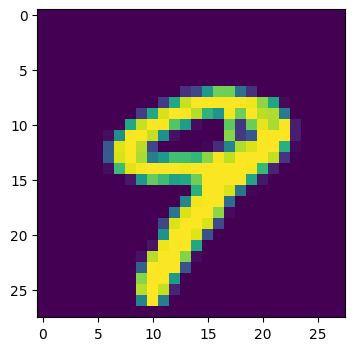

Reconstruction


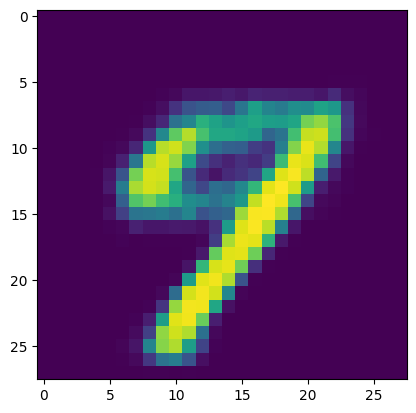

In [ ]:
for i in range(10):
  plt.figure(figsize=(4,4))
  print("Original")
  plt.imshow(X_test[i])
  plt.show()
  print("Reconstruction")
  plt.imshow(passed_images[i])
  plt.show()

# Section 2

In [ ]:
from tensorflow.keras.layers import GaussianNoise

In [ ]:
sample = GaussianNoise(0.2)

In [ ]:
noisy = sample(X_test[:10],training=True)

Original


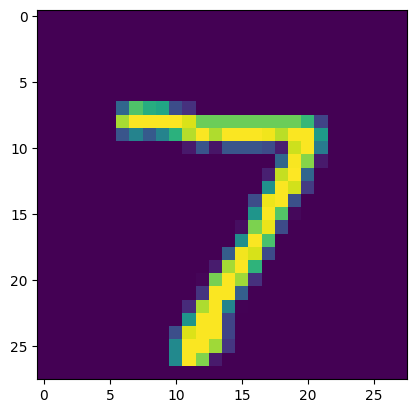

Noise


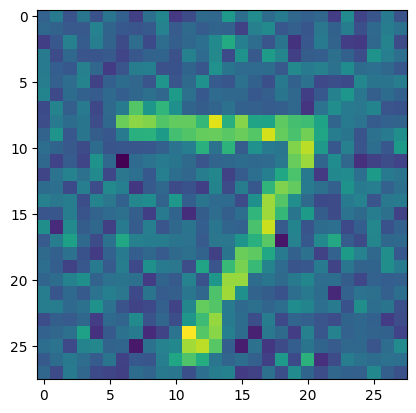

In [ ]:
n = 0
print("Original")
plt.imshow(X_test[n])
plt.show()
print("Noise")
plt.imshow(noisy[n])
plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
# total number of pixels = 784
tf.random.set_seed(101)
np.random.seed(101)
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2)) # layer to add noise

encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))


In [ ]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))



In [ ]:
noise_remover = Sequential([encoder,decoder])

In [ ]:
noise_remover.compile(loss='binary_crossentropy',optimizer='adam',
                      metrics=['accuracy'])

In [ ]:
noise_remover.fit(X_train,X_train,epochs=8)

Epoch 1/8
1875/1875 [==============================] - 27s 13ms/step - loss: 0.1685 - accuracy: 0.1822
Epoch 2/8
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1287 - accuracy: 0.2324
Epoch 3/8
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1205 - accuracy: 0.2465
Epoch 4/8
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1151 - accuracy: 0.2545
Epoch 5/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1115 - accuracy: 0.2605
Epoch 6/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1092 - accuracy: 0.2642
Epoch 7/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1074 - accuracy: 0.2678
Epoch 8/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1057 - accuracy: 0.2718


In [ ]:
ten_noisy_images = sample(X_test[:10],training=True)

In [ ]:
noise_removed = noise_remover(ten_noisy_images)

ORIGINAL


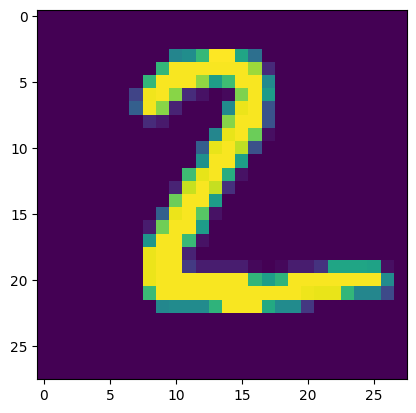

Noise Added


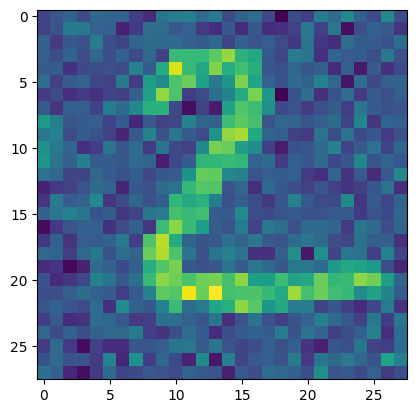

Noise Removed


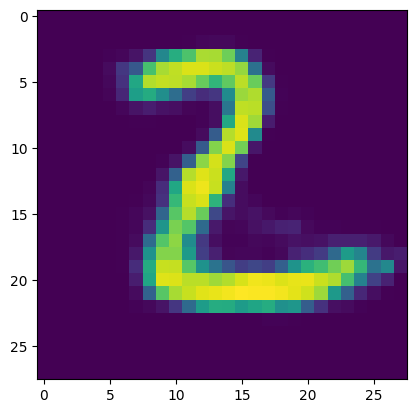

In [ ]:
n = 1
print("ORIGINAL")
plt.imshow(X_test[n])
plt.show()
print("Noise Added")
plt.imshow(ten_noisy_images[n])
plt.show()
print("Noise Removed")
plt.imshow(noise_removed[n])
plt.show()